In [1]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [34]:
data = pd.read_csv('datasets/train_X.csv')
test_data = pd.read_csv('datasets/test_Y.csv')

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Clean data

In [35]:
# nettoyer data null dans les colomnes numériques
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace = True)

#test_data
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace = True)


In [71]:
a = data.groupby(['Dependents']).count()
b = a.iloc[0,0]

360

In [5]:
data.groupby(['Credit_History']).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Credit_History,,,,,,,,,,,,
0.0,89,86,89,84,89,88,89,89,89,89,89,89
1.0,475,466,472,465,475,450,475,475,475,475,475,475


In [39]:
# nettoyer data null dans les colomnes catagoriques
data['Dependents'].fillna('0',inplace = True)
data['Credit_History'].fillna(1,inplace = True)

#test_data
test_data['Dependents'].fillna('0',inplace = True)
test_data['Credit_History'].fillna(1,inplace = True)

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# supprimer data null dans les colomnes catagoriques
clean_data = data.dropna()

#test_data
test_clean_data = test_data.dropna()

In [9]:
clean_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
clean_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Encode data

In [44]:
#let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
dataNum=clean_data.apply(string_to_int.fit_transform) #fit and transform it

#test_data
test_dataNum=test_clean_data.apply(string_to_int.fit_transform) #fit and transform it

In [12]:
dataNum

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,354,0,98,9,1,2,1
1,1,1,1,1,0,0,287,58,79,9,1,0,0
2,2,1,1,0,0,1,129,0,25,9,1,2,1
3,3,1,1,0,1,0,85,152,71,9,1,2,1
4,4,1,0,0,0,0,359,0,92,9,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,561,0,0,0,0,0,117,0,28,9,1,0,1
610,562,1,1,3,0,0,257,0,7,5,1,0,1
611,563,1,1,1,0,0,407,3,160,9,1,2,1
612,564,1,1,2,0,0,398,0,130,9,1,2,1


### Training data

In [13]:
y = dataNum['Loan_Status']
X0 = dataNum.drop(['Loan_Status', 'Loan_ID'], axis=1)

In [14]:
X0.shape

(566, 11)

In [15]:
X0.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
y.shape

(566,)

### test_data

In [46]:
testX = test_dataNum.drop(['Loan_ID'], axis=1)

In [47]:
testX

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,232,0,51,10,1,2
1,1,1,1,0,0,91,41,66,10,1,2
2,1,1,2,0,0,212,62,118,10,1,2
3,1,1,2,0,0,36,104,41,10,1,2
4,1,0,0,1,0,108,0,24,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,161,60,53,10,1,2
363,1,1,0,0,0,170,10,55,10,1,2
364,1,0,0,0,0,105,70,66,10,1,1
365,1,1,0,0,0,212,95,94,10,1,0


### Normalisation

In [48]:
# Normalisation 
from sklearn import preprocessing

x = X0.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled,columns = X0.columns)

#test_data
x = testX.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled,columns = testX.columns)


In [20]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.750000,0.000000,0.505155,0.9,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.608051,0.213235,0.407216,0.9,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.273305,0.000000,0.128866,0.9,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.180085,0.558824,0.365979,0.9,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.760593,0.000000,0.474227,0.9,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
561,0.0,0.0,0.000000,0.0,0.0,0.247881,0.000000,0.144330,0.9,1.0,0.0
562,1.0,1.0,1.000000,0.0,0.0,0.544492,0.000000,0.036082,0.5,1.0,0.0
563,1.0,1.0,0.333333,0.0,0.0,0.862288,0.011029,0.824742,0.9,1.0,1.0
564,1.0,1.0,0.666667,0.0,0.0,0.843220,0.000000,0.670103,0.9,1.0,1.0


### Training Model

#### Cross validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Cross validation
param_depth = range(1,31)

d_score = []

for d in param_depth:
    model_tree  = DecisionTreeClassifier(criterion='entropy',max_depth = d)

    d_scores = cross_val_score(model_tree, X, y, cv=10, scoring='accuracy')

    d_score.append(d_scores.mean())


Text(0, 0.5, 'Cross-Validated Accuracy')

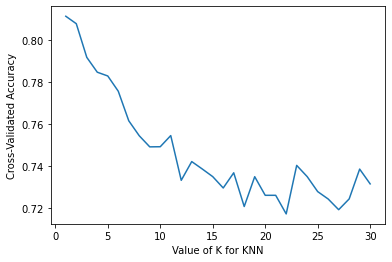

In [22]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(param_depth, d_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### GridSearchCV double parametre

In [23]:
param_depth = range(1,31)
param_leaf = [3,4,5,6,7]
param_criterion = ['gini','entropy']
param_split = list(range(2,8))

param_grid = dict(max_depth=list(param_depth), min_samples_leaf = param_leaf, criterion = param_criterion, min_samples_split = param_split)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_leaf': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6, 7]}


In [24]:
model_tree  = DecisionTreeClassifier()
grid = GridSearchCV(model_tree, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [25]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}


### Plot DT

In [73]:
model_tree = DecisionTreeClassifier(criterion='gini',max_depth=1, min_samples_leaf=3)

# Entraînement du modèle d'arbre

model_tree.fit(X, y)  
print(model_tree.score)

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=1, min_samples_leaf=3)>


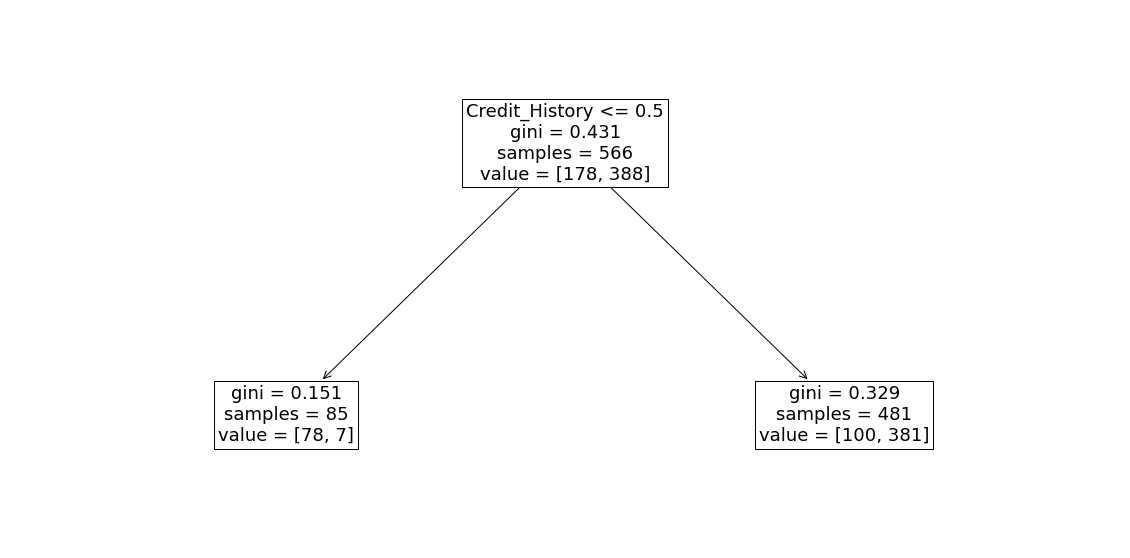

In [74]:
plt.figure(figsize =(20,10))
tree.plot_tree(model_tree, feature_names = X.columns, fontsize = 18)
plt.show()

### Import Test data

In [78]:
test_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.814035,0.000000,0.364286,0.909091,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.319298,0.232955,0.471429,0.909091,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.743860,0.352273,0.842857,0.909091,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.126316,0.590909,0.292857,0.909091,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.378947,0.000000,0.171429,0.909091,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
328,1.0,1.0,1.000000,1.0,1.0,0.564912,0.340909,0.378571,0.909091,1.0,1.0
329,1.0,1.0,0.000000,0.0,0.0,0.596491,0.056818,0.392857,0.909091,1.0,1.0
330,1.0,0.0,0.000000,0.0,0.0,0.368421,0.397727,0.471429,0.909091,1.0,0.5
331,1.0,1.0,0.000000,0.0,0.0,0.743860,0.539773,0.671429,0.909091,1.0,0.0


In [79]:
pred_y = model_tree.predict(test_X)

### confusion metric

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_train=model_tree.predict(X_train)
cm=confusion_matrix(y_train, y_pred_train)